In [1]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
I = lambda_0 = sp.Matrix([
        [1,0,0],
        [0,1,0],
        [0,0,1]
    ])
lambda_1 = sp.Matrix([
        [0,1,0],
        [1,0,0],
        [0,0,0]
    ])
lambda_2 = sp.Matrix([
        [0,-1j,0],
        [1j,0,0],
        [0,0,0]
    ])
lambda_3 = sp.Matrix([
        [1,0,0],
        [0,-1,0],
        [0,0,0]
    ])
lambda_4 = sp.Matrix([
        [0,0,1],
        [0,0,0],
        [1,0,0]
    ])
lambda_5 = sp.Matrix([
        [0,0,-1j],
        [0,0,0],
        [1j,0,0]
    ])
lambda_6 = sp.Matrix([
        [0,0,0],
        [0,0,1],
        [0,1,0]
    ])
lambda_7 = sp.Matrix([
        [0,0,0],
        [0,0,-1j],
        [0,1j,0]
    ])
lambda_8 = (1/sp.sqrt(3))*sp.Matrix([
        [1,0,0],
        [0,1,0],
        [0,0,-2]
    ])
m_1 = sp.Symbol("m_1")
m_2 = sp.Symbol("m_2")
m_3 = sp.Symbol("m_3")
m_4 = sp.Symbol("m_4")
m_5 = sp.Symbol("m_5")
m_6 = sp.Symbol("m_6")
m_7 = sp.Symbol("m_7")
m_8 = sp.Symbol("m_8")

n_1 = sp.Symbol("n_1")
n_2 = sp.Symbol("n_2")
n_3 = sp.Symbol("n_3")
n_4 = sp.Symbol("n_4")
n_5 = sp.Symbol("n_5")
n_6 = sp.Symbol("n_6")
n_7 = sp.Symbol("n_7")
n_8 = sp.Symbol("n_8")

l_1=sp.Symbol("\lambda_1",commutative=False)
l_2=sp.Symbol("\lambda_2",commutative=False)
l_3=sp.Symbol("\lambda_3",commutative=False)
l_4=sp.Symbol("\lambda_4",commutative=False)
l_5=sp.Symbol("\lambda_5",commutative=False)
l_6=sp.Symbol("\lambda_6",commutative=False)
l_7=sp.Symbol("\lambda_7",commutative=False)
l_8=sp.Symbol("\lambda_8",commutative=False)

In [3]:
def comm(A,B):
    return (A*B-B*A)
comm(lambda_4,lambda_5)


Matrix([
[2.0*I, 0,      0],
[    0, 0,      0],
[    0, 0, -2.0*I]])

In [4]:
#generating the tensors
import itertools

def parity(new,old,sym=False): # returns the parity, 1 if even, -1 if odd
    if sym == False:
        for i in np.arange(len(new)):
            if new[0] == old[0] and new[1] == old[1] and new[2] == old[2]:
                return 1
            old = old[1:] + old[:1]
        return -1
    else:
        return 1
def gen_perm_objects(perm_list,original,sym=False):
    perm_objects = []
    for perm_el in perm_list:
        perm_objects.append({'perm':perm_el,'parity':parity(perm_el,original,sym)})
    return perm_objects

listA = [0, 1, 2]
perm = itertools.permutations(listA)

obj_list = gen_perm_objects(perm,listA)
print("writing out the permutations and parities")
for obj in obj_list:
    print(obj)

M = np.zeros((3,3,3))
def make_eps(obj_list):
    M = np.zeros((3,3,3))
    for obj in obj_list:
        perm = obj['perm']
        i,j,k = perm[0],perm[1],perm[2]
        M[i][j][k] =1* obj['parity']
    return M

M = make_eps(obj_list)

def gen_f():
    a = []
    half = sp.sympify(1)/sp.sympify(2)
    a.append({'ind':[0,1,2],'num':sp.sympify(1)})
    a.append({'ind':[3,4,7],'num':sp.sqrt(3)/2})
    a.append({'ind':[5,6,7],'num':sp.sqrt(3)/2})
    a.append({'ind':[0,3,6],'num':half})
    a.append({'ind':[1,3,5],'num':half})
    a.append({'ind':[1,4,6],'num':half})
    a.append({'ind':[2,3,4],'num':half})
    a.append({'ind':[4,0,5],'num':half})
    a.append({'ind':[5,2,6],'num':half})
    return a
def gen_d():
    a = []
    half = sp.sympify(1)/sp.sympify(2)
    inv_sq_r_3 = sp.sympify(1)/sp.sqrt(sp.sympify(3))
    a.append({'ind':[0,0,7],'num':inv_sq_r_3})
    a.append({'ind':[1,1,7],'num':inv_sq_r_3})
    a.append({'ind':[2,2,7],'num':inv_sq_r_3})
    a.append({'ind':[7,7,7],'num':-inv_sq_r_3})
    a.append({'ind':[0,3,5],'num':half})
    a.append({'ind':[0,4,6],'num':half})
    a.append({'ind':[1,3,6],'num':-half})
    a.append({'ind':[1,4,5],'num':half})
    a.append({'ind':[2,3,3],'num':half})
    a.append({'ind':[2,4,4],'num':half})
    a.append({'ind':[2,5,5],'num':-half})
    a.append({'ind':[2,6,6],'num':-half})
    a.append({'ind':[3,3,7],'num':-half*inv_sq_r_3})
    a.append({'ind':[4,4,7],'num':-half*inv_sq_r_3})
    a.append({'ind':[5,5,7],'num':-half*inv_sq_r_3})
    a.append({'ind':[6,6,7],'num':-half*inv_sq_r_3})
    return a

def fill_up_once(obj_list,M,numm):
    for obj in obj_list:
        perm = obj['perm']
        i,j,k = perm[0],perm[1],perm[2]
        M[i][j][k] =sp.sympify(numm * sp.sympify(obj['parity'],evaluate=False),evaluate=False)
    return M
def gen_tensor(component_list,sym=False):
    f_list = component_list
    M = np.full((8,8,8),sp.sympify(0))
    for f in f_list:
        perm = itertools.permutations(f['ind'])
        obj_list = gen_perm_objects(perm,f['ind'],sym)
        M=fill_up_once(obj_list,M,f['num'])
    return M
f = gen_tensor(gen_f())
d = gen_tensor(gen_d(),True)

def delta(i,j):
    if i==j:
        return 1
    else:
        return 0

writing out the permutations and parities
{'perm': (0, 1, 2), 'parity': 1}
{'perm': (0, 2, 1), 'parity': -1}
{'perm': (1, 0, 2), 'parity': -1}
{'perm': (1, 2, 0), 'parity': 1}
{'perm': (2, 0, 1), 'parity': 1}
{'perm': (2, 1, 0), 'parity': -1}


In [5]:
#creating a function multiplying two lambdas:
def lamb_mul(lam1,lam2):
    lam_dict = {1:l_1,2:l_2,3:l_3,4:l_4,5:l_5,6:l_6,7:l_7,8:l_8}
    if (not lam1 in lam_dict.values()) or (not lam2 in lam_dict.values()):
        raise Exception('the input in lamb_mul() function is invalid, should be a gell-mann matrix(well the sympy object of it)')
    
    key_1 = list(lam_dict.keys())[list(lam_dict.values()).index(lam1)] #finding the number of the gell man matrices
    key_2 = list(lam_dict.keys())[list(lam_dict.values()).index(lam2)]
    
    #l_j l_k = 2/3 delta_j_k + d_j_k_l l_l + i f_j_k_l l_l
    first_term = (sp.sympify(2)/sp.sympify(3))*delta(key_1,key_2)
    second_term = sum([value*lam_dict[i+1] for i,value in enumerate(d[key_1-1][key_2-1])])
    third_term = sp.I*sum([value*lam_dict[i+1] for i,value in enumerate(f[key_1-1][key_2-1])])
    return first_term+second_term+third_term

lamb_mul(l_2,l_2) #test


2/3 + sqrt(3)*\lambda_8/3

In [6]:
display(lamb_mul(l_1,l_6))
display(lamb_mul(l_6,l_1))
sp.simplify(lamb_mul(l_1,l_6)+lamb_mul(l_6,l_1))

\lambda_4/2 + I*\lambda_5/2

\lambda_4/2 - I*\lambda_5/2

\lambda_4

In [7]:


def check_term(term):
    lam_args=[]
    lam_dict = {1:l_1,2:l_2,3:l_3,4:l_4,5:l_5,6:l_6,7:l_7,8:l_8}
    if term.func == sp.Mul:
        args = term.args
        for arg in args:
            if arg.is_Symbol and arg in lam_dict.values():
                lam_args.append(arg)
            if arg.is_Pow and arg.args[0] in lam_dict.values():
                for i in range(arg.args[1]):
                    lam_args.append(arg.args[0])
    if len(lam_args)>1:
        lie_prod = lamb_mul(lam_args[0],lam_args[1])
        if len(lam_args)>2:
            for i in range(2,len(lam_args)):
                lie_prod=lie_prod*lam_args[i]
            return term.subs(np.array(lam_args).prod(),lie_prod)
        else:
            return term.subs(np.array(lam_args).prod(),lie_prod)
            
    else:
        
        return term


def check_expr(expr):
    new_expr = sp.sympify(0)
    for term in expr.args:
        new_expr += check_term(term)
    
    return new_expr.expand()





In [8]:

# the functioning function that takes an expression and simplifies, needs to be used a few times to simplify completely
class check_term_2_class:
    def __init__(self):
        self.lam_dict = {1:l_1,2:l_2,3:l_3,4:l_4,5:l_5,6:l_6,7:l_7,8:l_8}
        self.lam_args = []
        
    def check_term_2(self,term):
        Type = term.func
        if Type == sp.Mul:
            for arg in term.args:
                self.check_term_2(arg)
        elif Type == sp.Pow and term.args[0] in self.lam_dict.values():
            for times in range(term.args[1]):
                self.lam_args.append(term.args[0])
        elif Type == sp.Symbol and term in self.lam_dict.values():
            self.lam_args.append(term)
            
    def check_expr(self,expr):
        
        new_expr = sp.sympify(0)
        if expr.func == sp.Add:
            for term in expr.args:
                self.lam_args = []
                self.check_term_2(term)
                try:
                    new_expr += term.subs(np.array(self.lam_args)[:2].prod(),lamb_mul(self.lam_args[0],self.lam_args[1]))
                except:  
                    #print("did not do the multiplication")
                    new_expr += term
            return new_expr

        elif expr.func == sp.Mul:
            #print("in check_expr, the input expression is sp.Mul() object")
            return expr
        else:
            raise Exception("in check_expr, the input expression is not sp.Add() object")


In [9]:
#lam_dict = {1:l_1,2:l_2,3:l_3,4:l_4,5:l_5,6:l_6,7:l_7,8:l_8}
def is_inside(el): # used in con_to_rho()
    lam_dict = {1:l_1,2:l_2,3:l_3,4:l_4,5:l_5,6:l_6,7:l_7,8:l_8}
    for El in lam_dict.values():
        if El in el.args:
            return True
    return False

def con_to_rho(expr): #converts the expression to a dictionary of rho elements
    lam_dict = {1:l_1,2:l_2,3:l_3,4:l_4,5:l_5,6:l_6,7:l_7,8:l_8}
    rho_l ={}
    for key in lam_dict:
        Term=sp.sympify(0)
        for term in expr.args:
            if lam_dict[key] in term.args:
                Term+=term
        rho_l[key] = sp.factor(sp.simplify(sp.sqrt(3)*Term))#sp.factor(sp.simplify(sp.sqrt(3)*sp.trigsimp(Term)))#
    Term = 0
    for term in expr.args:
            if not is_inside(term):
                Term+=term
    rho_l[0] = sp.simplify(3*Term)
    return rho_l
def print_out(dic): #takes the output dictionary of con_to_rho and displays the elements
    for key in dic:
        print("lambda "+str(key),end = " ")
        display(dic[key])

def calculate(expr): # uses all functions to just simplify an expression
    checking = check_term_2_class()
    for i in range(7):
        expr = checking.check_expr(expr).expand()
    #print_out(con_to_rho(expr))
    return con_to_rho(expr)

def calculate_2(expr): # uses all functions to just simplify an expression
    checking = check_term_2_class()
    for i in range(7):
        expr = checking.check_expr(expr).expand()
    #print_out(con_to_rho(expr))
    return expr

In [10]:
class plotting_m_2:
    def __init__(self):
        print("plotting_m_2 initialized")
    def circle(self,ax):
        theta = np.linspace(0,2*np.pi,100)
        x= np.cos(theta)
        y= np.sin(theta)
        ax.plot(x,y) # outer boundary
        ax.plot((1/2)*x,(1/2)*y) # inner boundary
        ax.plot((1/np.sqrt(3))*x,(1/np.sqrt(3))*y) # middle boundary
        ax.plot([0],[0],marker="o", markersize=3, color="blue")

    def plot_cartan(self,ax):
        ax.plot([-np.sqrt(3)/2,np.sqrt(3)/2],[1/2,1/2],'b')
        ax.plot([0,-np.sqrt(3)/2],[-1,1/2],'b')
        ax.plot([0,np.sqrt(3)/2],[-1,1/2],'b')
        ax.text(np.sqrt(3)/2+0.01, 1/2+0.02, 'state C', fontsize=12)
        ax.text(-np.sqrt(3)/2-0.14, 1/2+0.02, 'state B', fontsize=12)
        ax.text(-0.045, -1-0.1, 'state A', fontsize=12)
        
        D = 1.2 #the displacement size of the plot
        ax.axis([-D, D, -D, D])
        #axis.xlabel("m_3",fontsize=16)
        #axis.ylabel("m_8",fontsize=16)

    def plot_m_n(self,m,n,ax,text):
        ax.plot(m,n,label = text)
        ax.legend()

In [11]:
class SU_3:
    def __init__(self): #only valid for 3 dim
        #following is valid if the determinant of the generator does not vary
        #self.phi = self.det_to_phi(sp.det(H_sample))
        #generating coefficients:
        #self.C_1,self.C_2,self.C_3 = self.gen_coefficients(self.phi)
        #one extra thing: the unitary matrix:
        self.Identity =  sp.eye(3)

    def det_to_phi(self,H_det):
        pickle  = sp.Symbol("pickle")
        res  = sp.solvers.solve((2/(3*sp.sqrt(3)))*sp.sin(3*pickle)+H_det,pickle)
        return min(res)

    def outside_brackets(self,phi,k): # used in self.gen_coefficients(phi)
        out_bra_u = (sp.exp((2/sp.sqrt(3))*1j*sp.Symbol("t")*(sp.sin(phi+(2*sp.pi*k)/3)))).evalf()
        out_bra_l = (1 - 2*sp.cos(2*(phi+(2*sp.pi*k)/3))).evalf()
        out_bra   = out_bra_u/out_bra_l
        return out_bra     

    def gen_coefficients(self,phi):
        C_1,C_2,C_3 = 0,0,0
        for k in range(3):
            out_bra = self.outside_brackets(phi,k)
            C_1+=out_bra
            C_2+=(2/sp.sqrt(3))*(sp.sin(phi+(2*sp.pi*k)/3))*out_bra
            C_3+=-(1/3)*(1+2*sp.cos(2*(phi+(2*sp.pi*k)/3)))*out_bra #sp.eye((self.H).shape[0])
        return C_1.evalf(),C_2.evalf(),C_3.evalf()
    def gen_matrix(self,H):
        l_list =[l_1,l_2,l_3,l_4,l_5,l_6,l_7,l_8]
        lambda_list = [lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8]
        for i in range(8):
            H = H.subs(l_list[i],lambda_list[i])
        return H

    def gen_unitary_m(self,H): #input H/h must be evaluated already (no t dependence)
        #H_matrix = self.gen_matrix(H)

        phi = self.det_to_phi(sp.det(H))
        C_1,C_2,C_3 = self.gen_coefficients(phi)
        return H*H*C_1+H*C_2+sp.sympify(1)*C_3


In [12]:

#n_3=-sp.sqrt(3)/2#sp.Symbol("n_3")
#n_8=sp.sympify(1)/2#sp.Symbol("n_8")

RHO = (sp.sympify(1)/sp.sympify(3))*(sp.sympify(1)+sp.sqrt(3)*(n_3*l_3+n_8*l_8+n_1*l_1+n_2*l_2+n_4*l_4+n_5*l_5+n_6*l_6+n_7*l_7))
#RHO = (sp.sympify(1)/sp.sympify(3))*(sp.sympify(1)+sp.sqrt(3)*(n_4*l_4))

#RHO = sp.sympify(1)
#RHO = (sp.sympify(1)/3)*(1+sp.sqrt(3)*((sp.sympify(-sp.sqrt(3))/sp.sympify(2))*l_3+(sp.sympify(1)/sp.sympify(2))*l_8))
RHO = (sp.sympify(1)/3)*(1+sp.sqrt(3)*((sp.sympify(1)/sp.sympify(2))*l_8))
RHO = n_6*l_6+n_1*l_1+n_8*l_8
#H = l_6 #sp.Symbol("H",commutative=False)
#H = ((1/sp.sqrt(2))*l_1+(1/sp.sqrt(2))*l_6)
phi = sp.Symbol("\phi")
b=sp.sin(phi)#sp.sympify(99)/sp.sympify(100)
a=sp.cos(phi)#sp.sqrt(sp.sympify(1)-b**2)
#b= b.subs(phi,0.2)
#a= a.subs(phi,0.2)
#H = (a*l_1+b*l_6)
H = l_2
#H = n_1*l_1+n_2*l_2+n_3*l_3+n_4*l_4+n_5*l_5+n_6*l_6+n_7*l_7+n_8*l_8
t=sp.Symbol("t")
U=1+sp.I*H*sp.sin(t)+(H**2)*(sp.cos(t)-1)
U_=1-sp.I*H*sp.sin(t)+(H**2)*(sp.cos(t)-1)
expr = sp.expand(U*RHO*U_)

t_ = (0.1/sp.sqrt(3))*t
UU = (sp.sympify(1)/sp.sympify(3))*(2+sp.sqrt(3)*l_8)*sp.exp((1/sp.sqrt(3))*sp.I*t_) + (sp.sympify(1)/sp.sympify(3))*(1-sp.sqrt(3)*l_8)*sp.exp((-sp.sympify(2)/sp.sqrt(3))*sp.I*t_)
UU_ =(sp.sympify(1)/sp.sympify(3))*(2+sp.sqrt(3)*l_8)*sp.exp((-1/sp.sqrt(3))*sp.I*t_) + (sp.sympify(1)/sp.sympify(3))*(1-sp.sqrt(3)*l_8)*sp.exp((sp.sympify(2)/sp.sqrt(3))*sp.I*t_)
expr8 = sp.expand(UU*RHO*UU_)
display(UU)
display(UU_)
full_expr = sp.expand(UU*U*RHO*U_*UU_)
#display(sp.simplify(UU*UU_))
"""nu = sp.Symbol('\eta')
H =sp.cos(nu)*lambda_8 +sp.sin(nu)*sp.cos(phi)*lambda_1+sp.sin(nu)*sp.sin(phi)*lambda_6
su3 = SU_3()
U_full = su3.gen_unitary_m(H)"""
#display(U_full)

exp(0.0333333333333333*I*t)*(2 + sqrt(3)*\lambda_8)/3 + exp(-0.0666666666666667*I*t)*(1 - sqrt(3)*\lambda_8)/3

exp(0.0666666666666667*I*t)*(1 - sqrt(3)*\lambda_8)/3 + exp(-0.0333333333333333*I*t)*(2 + sqrt(3)*\lambda_8)/3

"nu = sp.Symbol('\\eta')\nH =sp.cos(nu)*lambda_8 +sp.sin(nu)*sp.cos(phi)*lambda_1+sp.sin(nu)*sp.sin(phi)*lambda_6\nsu3 = SU_3()\nU_full = su3.gen_unitary_m(H)"

In [13]:
A = sp.Symbol("A")
B = sp.Symbol("B")
C = sp.Symbol("C")
J8 = -(sp.sqrt(3)/2)*A
J3 = (1/sp.sympify(2))*(C-B)
sp.expand(J8**2+J3**2)

3*A**2/4 + B**2/4 - B*C/2 + C**2/4

In [14]:
m_l_sym = calculate(expr) #use calculate_2
display(sp.simplify(m_l_sym))

{1: -sqrt(3)*n_1*(2*sin(t)**2 - 1)*\lambda_1,
 2: 0,
 3: sqrt(3)*n_1*sin(2*t)*\lambda_3,
 4: sqrt(3)*n_6*sin(t)*\lambda_4,
 5: 0,
 6: sqrt(3)*n_6*cos(t)*\lambda_6,
 7: 0,
 8: sqrt(3)*n_8*\lambda_8,
 0: 0}

In [15]:
#m_l_sym2 =  calculate(expr8)

In [16]:
#m_l_sym_full =   calculate(full_expr)

In [17]:
def from_sym_to_num(m_l_dic,t_array): #takes a dictionary of sympy objects(and a time span) and returns the numpy m_l
    m_l=[]
    lam_dict = {1:l_1,2:l_2,3:l_3,4:l_4,5:l_5,6:l_6,7:l_7,8:l_8}
    for i in range(1,9):
        expr = m_l_dic[i].subs(lam_dict[i],1)
        f = lambdify(sp.Symbol("t"),expr,"numpy")
        l = f(t_array)
        if not type(l) == "numpy.ndarray":
            l=t_array*0+l
        m_l.append(l)
    return m_l
#m_l = from_sym_to_num(m_l_sym,np.linspace(0,15,100))

#m_l = from_sym_to_num(m_l_sym_full,np.linspace(0,15,100))

In [18]:
"""fig, axs = plt.subplots(2,2)
fig.set_size_inches(10, 10)
plotting = plotting_m_2()
plotting.circle(axs[0][0])
plotting.circle(axs[0][1])
plotting.circle(axs[1][0])
plotting.circle(axs[1][1])
plotting.plot_cartan(axs[0][0])
plotting.plot_m_n(m_l[2],m_l[7],axs[0][0],"3,8")
plotting.plot_m_n(m_l[0],m_l[1],axs[0][1],"1,2")
plotting.plot_m_n(m_l[3],m_l[4],axs[1][0],"4,5")
plotting.plot_m_n(m_l[5],m_l[6],axs[1][1],"6,7")"""

'fig, axs = plt.subplots(2,2)\nfig.set_size_inches(10, 10)\nplotting = plotting_m_2()\nplotting.circle(axs[0][0])\nplotting.circle(axs[0][1])\nplotting.circle(axs[1][0])\nplotting.circle(axs[1][1])\nplotting.plot_cartan(axs[0][0])\nplotting.plot_m_n(m_l[2],m_l[7],axs[0][0],"3,8")\nplotting.plot_m_n(m_l[0],m_l[1],axs[0][1],"1,2")\nplotting.plot_m_n(m_l[3],m_l[4],axs[1][0],"4,5")\nplotting.plot_m_n(m_l[5],m_l[6],axs[1][1],"6,7")'

In [19]:

print_out(m_l_sym)

lambda 1 

-sqrt(3)*n_1*(2*sin(t)**2 - 1)*\lambda_1

lambda 2 

0

lambda 3 

sqrt(3)*n_1*sin(2*t)*\lambda_3

lambda 4 

sqrt(3)*n_6*sin(t)*\lambda_4

lambda 5 

0

lambda 6 

sqrt(3)*n_6*cos(t)*\lambda_6

lambda 7 

0

lambda 8 

sqrt(3)*n_8*\lambda_8

lambda 0 

0

In [20]:
lamb_mul(l_8,l_8)

2/3 - sqrt(3)*\lambda_8/3

In [21]:
a =lambdify([n_4,phi,t],m_l_sym[0],"numpy") #cheking if the last one is really 1

In [22]:
a(1,1,1)

0

In [23]:
"""H1 =n_8*lambda_8
H2 = n_1*lambda_1+n_6*lambda_6
display(H1)
display(H2)
display(sp.simplify(H1*H2-H2*H1))

#display(lamb_mul(l_6,l_8))
#display(lamb_mul(l_8,l_6))
display(sp.simplify(lamb_mul(l_6,l_8)-lamb_mul(l_8,l_6)))
display(sp.simplify(lamb_mul(l_1,l_8)-lamb_mul(l_8,l_1)))
display(sp.simplify(lamb_mul(l_1,l_6)-lamb_mul(l_6,l_1)))
"""

"""H_test = (d_ba/sp.sqrt(3))*lambda_8 + (1/sp.sympify(2))*lambda_1+(Om_ba/sp.sympify(2))*lambda_6
H_1 = (d_ba/sp.sqrt(3))*lambda_8
H_2 = (1/sp.sympify(2))*lambda_1+(Om_ba/sp.sympify(2))*lambda_6
display(H_1*H_2-H_2*H_1)
H_1_ = (d_ba/sp.sqrt(3))*l_8
H_2_ = (1/sp.sympify(2))*l_1+(Om_ba/sp.sympify(2))*l_6
exprr = sp.expand(H_1_*H_2_-H_2_*H_1_)
display(exprr)
print(exprr.func)
print(exprr.args)
dic = calculate_2(exprr)
display(dic)"""
d_ba =sp.Symbol("\delta_{ba}")
D =sp.Symbol("\Delta")
Om_ba =sp.Symbol("\Omega_{ba}")
Om_cb = sp.Symbol("\Omega_{cb}")
X = (D/sp.sqrt(3))*l_8
Y = (sp.sympify(1)/sp.sympify(2))*(sp.cos(phi)*l_1 + sp.sin(phi)*l_6)

In [24]:
first=calculate_2(sp.expand(X*Y-Y*X))
display(first)
second = calculate_2(sp.expand(sp.sympify(2)*(Y*first-first*Y)+(X*first-first*X)))
#sp.expand(sp.sympify(2)*(Y*first-first*Y)+(X*first-first*X))
second

I*\Delta*sin(\phi)*\lambda_7/2

\Delta**2*sin(\phi)*\lambda_6/2 + \Delta*sin(\phi)**2*\lambda_3/2 - sqrt(3)*\Delta*sin(\phi)**2*\lambda_8/2 + \Delta*sin(\phi)*cos(\phi)*\lambda_4/2

In [25]:
nu = sp.Symbol('\eta')

H =sp.cos(nu)*lambda_8 +sp.sin(nu)*sp.cos(phi)*lambda_1+sp.sin(nu)*sp.sin(phi)*lambda_6
display(sp.det(H))
display(sp.trigsimp(sp.det(H)))

-sqrt(3)*sin(\eta)**2*sin(\phi)**2*cos(\eta)/3 + 2*sqrt(3)*sin(\eta)**2*cos(\eta)*cos(\phi)**2/3 - 2*sqrt(3)*cos(\eta)**3/9

sqrt(3)*(-sin(\eta)**2*sin(\phi)**2 + 8*sin(\eta)**2/9 - 2/9)*cos(\eta)

In [26]:
H_det = sp.det(H)
res  = sp.solvers.solve((2/(3*sp.sqrt(3)))*sp.sin(3*D)+H_det,D)
res[1]


asin((9*sin(\eta)**2*sin(\phi)**2/2 - 4*sin(\eta)**2 + 1)*cos(\eta))/3

In [27]:
from sympy.physics.quantum.dagger import Dagger
import re
sig_0 = sp.Matrix([
        [1,0],
        [0,1],
    ])
sig_x = sp.Matrix([
        [0,1],
        [1,0],
    ])
sig_y = sp.Matrix([
        [0,-sp.I],
        [sp.I,0],
    ])
sig_z = sp.Matrix([
        [1,0],
        [0,-1],
    ])
vec_x = (1/sp.sqrt(2))*sp.Matrix([
        [1],
        [1],
    ])
vec_y = (1/sp.sqrt(2))*sp.Matrix([
        [1],
        [sp.I],
    ])
vec_z = (1/sp.sqrt(2))*sp.Matrix([
        [1],
        [0],
    ])
Dagger(vec_y)*sig_x*vec_y

Matrix([[0]])

In [28]:
eig_3 = lambda_3.eigenvects()[1][2][0]
eig_3
eig_2 = sp.Matrix([
        [0],
        [1],
        [0]
    ])
eig_3 = sp.Matrix([
        [0],
        [0],
        [1]
    ])
eig_1 = sp.Matrix([
        [1],
        [0],
        [0]
    ])

In [29]:
print(sp.latex(eig_1))

\left[\begin{matrix}1\\0\\0\end{matrix}\right]


In [30]:
RHO = (sp.sympify(1)/sp.sympify(3))*(lambda_0+sp.sqrt(3)*(n_3*lambda_3+n_8*lambda_8+n_1*lambda_1+n_2*lambda_2+n_4*lambda_4+n_5*lambda_5+n_6*lambda_6+n_7*lambda_7))
rho = (sp.sympify(1)/sp.sympify(3))*(sp.sympify(1)+sp.sqrt(3)*(n_3*l_3+n_8*l_8+n_1*l_1+n_2*l_2+n_4*l_4+n_5*l_5+n_6*l_6+n_7*l_7))
print(sp.latex(RHO))
#print(sp.latex(rho))
RHO

\left[\begin{matrix}\frac{\sqrt{3} \left(n_{3} + \frac{\sqrt{3} n_{8}}{3}\right)}{3} + \frac{1}{3} & \frac{\sqrt{3} \left(n_{1} - 1.0 i n_{2}\right)}{3} & \frac{\sqrt{3} \left(n_{4} - 1.0 i n_{5}\right)}{3}\\\frac{\sqrt{3} \left(n_{1} + 1.0 i n_{2}\right)}{3} & \frac{\sqrt{3} \left(- n_{3} + \frac{\sqrt{3} n_{8}}{3}\right)}{3} + \frac{1}{3} & \frac{\sqrt{3} \left(n_{6} - 1.0 i n_{7}\right)}{3}\\\frac{\sqrt{3} \left(n_{4} + 1.0 i n_{5}\right)}{3} & \frac{\sqrt{3} \left(n_{6} + 1.0 i n_{7}\right)}{3} & \frac{1}{3} - \frac{2 n_{8}}{3}\end{matrix}\right]


Matrix([
[sqrt(3)*(n_3 + sqrt(3)*n_8/3)/3 + 1/3,            sqrt(3)*(n_1 - 1.0*I*n_2)/3, sqrt(3)*(n_4 - 1.0*I*n_5)/3],
[          sqrt(3)*(n_1 + 1.0*I*n_2)/3, sqrt(3)*(-n_3 + sqrt(3)*n_8/3)/3 + 1/3, sqrt(3)*(n_6 - 1.0*I*n_7)/3],
[          sqrt(3)*(n_4 + 1.0*I*n_5)/3,            sqrt(3)*(n_6 + 1.0*I*n_7)/3,               1/3 - 2*n_8/3]])

In [31]:
Dagger(eig_1)*RHO*eig_1

Matrix([[sqrt(3)*(n_3 + sqrt(3)*n_8/3)/3 + 1/3]])

In [32]:
print(sp.latex((1/sp.sympify(3))*(lambda_0+(sp.sqrt(3)/2)*lambda_8)))

\left[\begin{matrix}\frac{1}{2} & 0 & 0\\0 & \frac{1}{2} & 0\\0 & 0 & 0\end{matrix}\right]


In [33]:
a = sp.Symbol("a")
b = sp.Symbol("b")
eps = sp.Symbol("\epsilon")
display(a)
display(b)
H =n_8*l_8+n_1*l_1+n_6*l_6
H_M = n_8*lambda_8+n_1*lambda_1+n_6*lambda_6
N6 = sp.sqrt((1-n_8**2)/(1+1/(eps**2)))
N1 = N6/eps
H_M_scaled = n_8*lambda_8 + N1*lambda_1+N6*lambda_6
H_M2 = sp.cos(a)*lambda_8+sp.sin(a)*sp.cos(b)*lambda_1+sp.sin(a)*sp.sin(b)*lambda_6
det_exp = sp.det(H_M)
det_exp_scaled = sp.det(H_M_scaled)

#for key in H_M2.eigenvals():
#        display(sp.trigsimp(key))
(H_M*H_M)[0]+(H_M*H_M)[4]+(H_M*H_M)[8]

a

b

2*n_1**2 + 2*n_6**2 + 2*n_8**2

In [34]:
Dagger(eig_3)*lambda_5*eig_1

Matrix([[1.0*I]])

In [35]:
class expressions:
    def __init__(self):
        self.k = sp.Symbol("k")
        self.phi = sp.Symbol("\phi")
        self.t   = sp.Symbol("t")
        self.B_k = 1-2*sp.cos(2*(self.phi+(2*sp.pi*self.k)/3))
        self.h_k = (2/sp.sqrt(3))*sp.sin(self.phi+(2*sp.pi*self.k)/3)
        
        self.B_0 = self.B_k.subs(self.k,0)
        self.B_1 = self.B_k.subs(self.k,1)
        self.B_2 = self.B_k.subs(self.k,2)
        
        self.h_0 = self.h_k.subs(self.k,0)
        self.h_1 = self.h_k.subs(self.k,1)
        self.h_2 = self.h_k.subs(self.k,2)
        
        self.h0  = sp.Symbol("h_0")
        self.h1  = sp.Symbol("h_1")
        self.h2  = sp.Symbol("h_2")
        
        self.B0  = 2+3*self.h1*self.h2
        self.B1  = 2+3*self.h0*self.h2
        self.B2  = 2+3*self.h1*self.h0

In [36]:
class C_to_A(expressions):
    def __init__(self):   
        expressions.__init__(self)
        #k = sp.Symbol("k")
        #upper = sp.exp((2/sp.sqrt(3))*sp.I*t*sp.sin(phi+(2*sp.pi*k)/3))
        #upper_ = sp.exp(-(2/sp.sqrt(3))*sp.I*t*sp.sin(phi+(2*sp.pi*k)/3))
        #lower = 1-2*sp.cos(2*(phi+(2*sp.pi*k)/3))
        #A = (upper.subs(k,0))/(lower.subs(k,0))+(upper.subs(k,1))/(lower.subs(k,1))+(upper.subs(k,2))/(lower.subs(k,2))
        #A_ = (upper_.subs(k,0))/(lower.subs(k,0))+(upper_.subs(k,1))/(lower.subs(k,1))+(upper_.subs(k,2))/(lower.subs(k,2))
        #self.naked_F = A*A_
        
    def gen_exp_1(self):
        zeroth = 1/(self.B_0**2)+1/(self.B_1**2)+1/(self.B_2**2)
        first  = sp.cos((self.h_0-self.h_1)*self.t)/(self.B_0*self.B_1)
        second = sp.cos((self.h_0-self.h_2)*self.t)/(self.B_0*self.B_2)
        third  = sp.cos((self.h_1-self.h_2)*self.t)/(self.B_1*self.B_2)
        return zeroth + 2*(first + second + third)
    def gen_exp_2(self):   
        factor = 2/(self.B_0*self.B_1*self.B_2)
        zeroth = -3
        first  = self.B_2 * sp.cos((self.h_0-self.h_1)*self.t)
        second = self.B_1 * sp.cos((self.h_0-self.h_2)*self.t)
        third  = self.B_0 * sp.cos((self.h_1-self.h_2)*self.t)
        return factor*(zeroth + first + second + third)
    def gen_exp_3(self):   
        factor = 2/(27*(self.h_0*self.h_1*self.h_2)**2-4)
        zeroth = -3
        first  = (2+3*self.h_0*self.h_1) * sp.cos((self.h_0-self.h_1)*self.t)
        second = (2+3*self.h_0*self.h_2) * sp.cos((self.h_0-self.h_2)*self.t)
        third  = (2+3*self.h_1*self.h_2) * sp.cos((self.h_1-self.h_2)*self.t)
        return (zeroth + first + second + third)*factor
    
    def det_to_phi(self,H_det):
        pickle  = sp.Symbol("pickle")
        res  = sp.solvers.solve((2/(3*sp.sqrt(3)))*sp.sin(3*pickle)+H_det,pickle)
        return float(min(res))
    
    def gen_phi(self,d_ba_s_val,EPS): #input d_ba scaled value and epsilon
        d_ba_s = sp.Symbol("\delta_{BA}")
        eps = sp.Symbol("\epsilon")
        Om_cb =sp.sqrt(1/((1/sp.sympify(3))*d_ba_s**2 + (1/sp.sympify(4))*(1+eps**2) )) #2*sp.sqrt((1-(d_ba**2)/3)/(1+eps**2))
        Om_ba = eps*Om_cb
        d_ba = d_ba_s*Om_cb
        H_M = (1/sp.sqrt(3))*d_ba*lambda_8 + (1/sp.sympify(2))*Om_cb*lambda_1 +(1/sp.sympify(2))*Om_ba*lambda_6 
        det_H = (sp.det(H_M).subs(d_ba_s,d_ba_s_val)).subs(eps,EPS)
        factor =(((1/sp.sympify(4))*(Om_cb*Om_ba)).subs(d_ba_s,d_ba_s_val)).subs(eps,EPS)
        return factor**2,self.det_to_phi(det_H)

   
    
inst = C_to_A()

EXP3 = inst.gen_exp_3()
F3   =lambdify([sp.Symbol("\phi"),sp.Symbol("t")],EXP3,"numpy")

EXP2 = inst.gen_exp_2()
F2   = lambdify([sp.Symbol("\phi"),sp.Symbol("t")],EXP2,"numpy")

EXP1 = inst.gen_exp_1()
F1   = lambdify([sp.Symbol("\phi"),sp.Symbol("t")],EXP1,"numpy")


#inst = C_to_A()
#FFF = lambdify([sp.Symbol("\phi"),sp.Symbol("t")],inst.gen_exp_1(),"numpy")
#FFFF = lambdify([sp.Symbol("\phi"),sp.Symbol("t")],inst.gen_exp_2(),"numpy")
#F5   = lambdify([sp.Symbol("\phi"),sp.Symbol("t")],inst.gen_exp_3(),"numpy")

In [102]:

def gen_max_amp(inst_,d_ba_s_l_,t__,EPS_):
    max_l_3 = []
    max_times = []
    for d_ba_s_val in d_ba_s_l_:
        factor_sqr,PHI = inst_.gen_phi(d_ba_s_val,EPS_)
        #factors.append((2*factor_sqr)/(27*(inst.h_1.subs(sp.Symbol("\phi"),PHI)*inst.h_0.subs(sp.Symbol("\phi"),PHI)*inst.h_2.subs(sp.Symbol("\phi"),PHI))**2  -4))
        #max_l_1.append(max(F1(PHI,t_))*factor_sqr)#*res[0])
        #max_l_2.append(max(F1(PHI,t_))*factor_sqr)#*res[0])
        amp_per_t = F3(PHI,t__)
        
        max_amp  = max(amp_per_t)
        max_l_3.append(max_amp*factor_sqr)
        
        max_times.append(t__[np.where(amp_per_t == max_amp)])
    return max_l_3,max_times


In [132]:
EPS_arr = list(np.linspace(0.01,0.2,30))#[0.01,0.02,0.03,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5]
d_ba_s_l = np.linspace(-0.51,-0.49,100)
t_ = np.linspace(0,300,1000)
max_max_l_2 = []
max_max_t_l_2 =[]

for EPS in EPS_arr:
    max_amp_arr,max_times_arr = gen_max_amp(inst,d_ba_s_l,t_,EPS)
    max_max_amp = max(max_amp_arr)
    max_max_l_2.append(max_max_amp)
    max_max_t_l_2.append(max_times_arr[max_amp_arr.index(max_max_amp)])


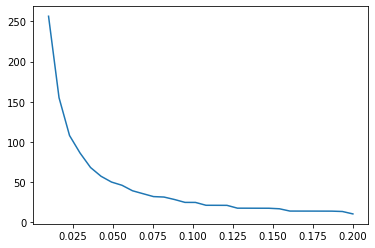

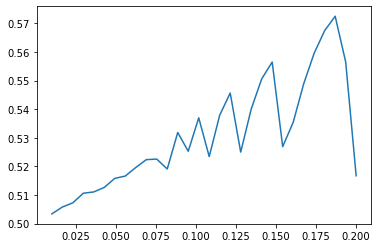

In [121]:

#%matplotlib inline
#plt.plot(t_,F3(0.0,t_))
#plt.plot(t_,F3(0.1,t_))
#plt.plot(t_,F3(0.2,t_))
#plt.plot(t_,F3(0.3,t_))
#plt.plot(t_,F3(0.4,t_))
#plt.plot(t_,F3(0.5,t_))
#plt.plot(t_,F3(0.6,t_))
#plt.plot(t_,F3(0.7,t_))
#plt.plot(d_ba_s_l,max_l_3_no_f)


#plt.plot(t_,F3(phis[phi_max_ind],t_),label="supposedly max")
#plt.legend()
#plt.figure()
#plt.plot(d_ba_s_l,np.array(phis))
#plt.plot(d_ba_s_l,max_l_3)
plt.plot(EPS_arr,max_max_t_l)
plt.figure()
plt.plot(EPS_arr,max_max_l)

In [153]:
%matplotlib qt
fig, axs = plt.subplots(1,2)
#fig.set_size_inches(10, 5)
axs[0].plot(EPS_arr,max_max_l,label = r"Max after $t \approx \frac{2\pi}{\sqrt{6}\epsilon}$")
axs[0].plot(EPS_arr,max_max_l_2,label =r"Max P after a long $t$")
axs[0].set_xlabel(r"$\epsilon$",fontsize=50)
axs[0].set_ylabel(r"$P_{max}(C\to A)$",fontsize=50)
axs[0].set_title(r"Max probability to be in state A ",fontsize = 30)
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[0].legend(fontsize = 20)

axs[1].plot(EPS_arr,max_max_t_l,label = r"$t_{max}'$ when simulating until $t =\frac{2\pi}{\sqrt{6}\epsilon}$")
axs[1].set_xlabel(r"$\epsilon$",fontsize=50)
axs[1].set_ylabel(r"$t_{max}(C\to A)$",fontsize=50)
axs[1].set_title(r"Time $t_{max}$ to reach $P_{max}(C\to A)$ ",fontsize = 30)
axs[1].tick_params(axis='both', which='major', labelsize=20)


eps_l_2 = np.linspace(0.01,0.2,1000)
t_max_an =(2*np.pi)/(np.sqrt(6)*eps_l_2) 
axs[1].plot(eps_l_2,t_max_an,"-r",label =r"$t =\frac{2\pi}{\sqrt{6}\epsilon}$")
axs[1].legend(fontsize = 20)

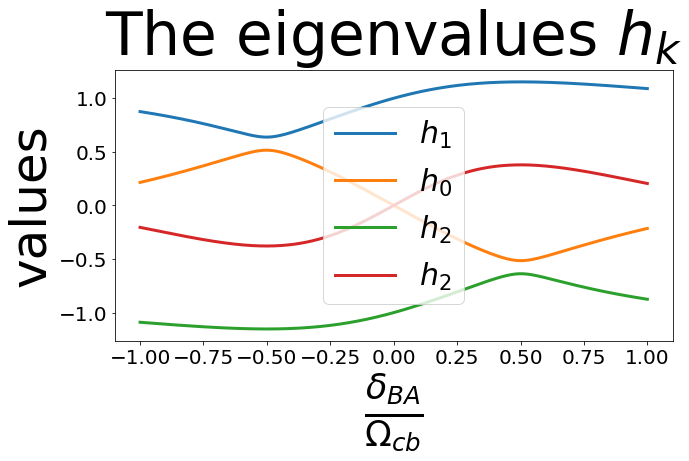

In [39]:
#%matplotlib qt


h_0_f = lambdify([sp.Symbol("\phi")],inst.h_0,"numpy")
h_1_f = lambdify([sp.Symbol("\phi")],inst.h_1,"numpy")
h_2_f = lambdify([sp.Symbol("\phi")],inst.h_2,"numpy")

fig, axs = plt.subplots()
fig.set_size_inches(10, 5)

H_0_vals = h_0_f(phis)
H_1_vals = h_1_f(phis)
H_2_vals = h_2_f(phis)

axs.plot(d_ba_s_l,H_1_vals ,label=r"$h_1$",linewidth=3)
axs.plot(d_ba_s_l,H_0_vals ,label=r"$h_0$",linewidth=3)
axs.plot(d_ba_s_l,H_2_vals ,label=r"$h_2$",linewidth=3)
axs.plot(d_ba_s_l,H_1_vals*H_0_vals*H_2_vals ,label=r"$h_2$",linewidth=3)

axs.set_xlabel(r"$\frac{\delta_{BA}}{\Omega_{cb}}$",fontsize=50)
axs.set_ylabel("values",fontsize=50)
axs.set_title(r"The eigenvalues $h_k $",fontsize = 60)
axs.tick_params(axis='both', which='major', labelsize=20)
axs.legend(fontsize = 30)

In [40]:
"""from mpl_toolkits import mplot3d
#%matplotlib qt

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(h_0_f(phis), h_1_f(phis), h_2_f(phis), 'gray')
b = np.linspace(0,2*np.pi,100)

ax.plot3D(2*np.cos(b), 2*np.sin(b), b*0, color='green')
ax.plot3D(b*0, 2*np.sin(b),2*np.cos(b) , color='green')
plt.show()"""

'from mpl_toolkits import mplot3d\n#%matplotlib qt\n\nfig = plt.figure()\nax = plt.axes(projection="3d")\nax.plot3D(h_0_f(phis), h_1_f(phis), h_2_f(phis), \'gray\')\nb = np.linspace(0,2*np.pi,100)\n\nax.plot3D(2*np.cos(b), 2*np.sin(b), b*0, color=\'green\')\nax.plot3D(b*0, 2*np.sin(b),2*np.cos(b) , color=\'green\')\nplt.show()'

0.06120817059587347
0.0012488133825645164
corr


-6*H**2*sin(a*t)**2 - 12*H**2*cos(3*H*t)*cos(a*t) + 3*H**2 + 12*H*a*sin(3*H*t)*sin(a*t) + 6*a**2*sin(a*t)**2 - 3*a**2 - 4*sin(a*t)**2 + 4*cos(3*H*t)*cos(a*t) - 1

- 6 H^{2} \sin^{2}{\left(a t \right)} - 12 H^{2} \cos{\left(3 H t \right)} \cos{\left(a t \right)} + 3 H^{2} + 12 H a \sin{\left(3 H t \right)} \sin{\left(a t \right)} + 6 a^{2} \sin^{2}{\left(a t \right)} - 3 a^{2} - 4 \sin^{2}{\left(a t \right)} + 4 \cos{\left(3 H t \right)} \cos{\left(a t \right)} - 1


6*a**2*sin(a*t)**2 - 3*a**2 + 4*sqrt(3)*a*sin(sqrt(3)*t)*sin(a*t) - 6*sin(a*t)**2

(-1, -4*sin(a*t)**2, -3*a**2, 3*H**2, -6*H**2*sin(a*t)**2, 4*cos(3*H*t)*cos(a*t), 6*a**2*sin(a*t)**2, -12*H**2*cos(3*H*t)*cos(a*t), 12*H*a*sin(3*H*t)*sin(a*t))
(-6, sin(a*t)**2)
appr


-6*sin(a*t)**2

corr


8*a**2*sin(a*t)**2 + 4*a**2*cos(a*t)*cos(sqrt(3)*t*sqrt(1 - a**2)) - 4*a**2 + 4*a*sqrt(3 - 3*a**2)*sin(a*t)*sin(sqrt(3)*t*sqrt(1 - a**2)) - 6*sin(a*t)**2

8 a^{2} \sin^{2}{\left(a t \right)} + 4 a^{2} \cos{\left(a t \right)} \cos{\left(\sqrt{3} t \sqrt{1 - a^{2}} \right)} - 4 a^{2} + 4 a \sqrt{3 - 3 a^{2}} \sin{\left(a t \right)} \sin{\left(\sqrt{3} t \sqrt{1 - a^{2}} \right)} - 6 \sin^{2}{\left(a t \right)}
a
0.06120817059587347


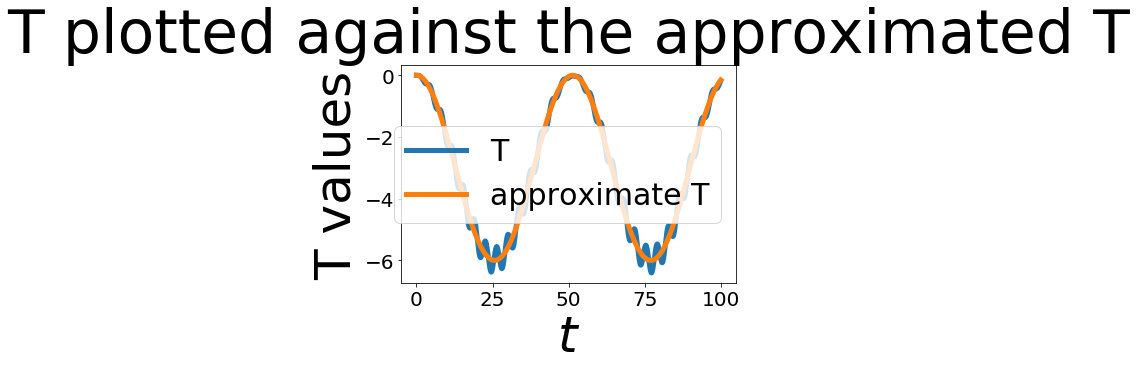

In [41]:
#%matplotlib qt
h0_max = inst.h_0.subs(sp.Symbol("\phi"),phi_max)
h1_max = inst.h_1.subs(sp.Symbol("\phi"),phi_max)
h2_max = inst.h_2.subs(sp.Symbol("\phi"),phi_max)
a_max = float(h1_max-h0_max)
print(float(a_max/2))
print((1/3)*(float(a_max/2)**2))

t_ = np.linspace(0,100,1000)
H = sp.Symbol("H")
a = sp.Symbol("a")
h0 =H-a
h1 = H+a
h2 = -2*H
t = sp.Symbol("t")
"""zeroth = -3
first  = (2+3*h0*h1) * sp.cos((h0-h1)*t)
second = (2+3*h0*h2) * sp.cos((h0-h2)*t)
third  = (2+3*h1*h2) * sp.cos((h1-h2)*t)"""
e = (2+3*h0*h1)*sp.cos((h0-h1)*t) + (2+3*h0*h2)*sp.cos((h0-h2)*t)+ (2+3*h1*h2)*sp.cos((h1-h2)*t)-3
e_s =sp.trigsimp(sp.expand(e))
print("corr")
display(e_s)
print(sp.latex(e_s))
display(e_s.subs(H,1/sp.sqrt(3)))
print(e_s.args)
e_s_app = ((e_s.subs(H,1/sp.sqrt(3))).subs(a**2,0)).args[0] #e_s- e_s.args[2] -e_s.args[6])
print(e_s_app.args)
print("appr")
display(e_s_app)

cor_exp =e_s.subs(H,sp.sqrt((1-(a**2))/3))
app_exp =e_s_app#.subs(H,sp.sqrt((1-(a**2))/3))
#term    =(e_s.args[1]).subs(H,sp.sqrt((1-(a**2))/3))
print("corr")
display(sp.simplify(cor_exp))
print(sp.latex(sp.simplify(cor_exp)))


f =lambdify([a,t],cor_exp)
g =lambdify([a,t],app_exp)
#term = lambdify([a,t],term)
fig, axs = plt.subplots()

axs.plot(t_,f(a_max/2,t_),label = "T",linewidth=5)
axs.plot(t_,g(a_max/2,t_),label = "approximate T",linewidth=5)
print("a")
print(a_max/2)
axs.set_xlabel(r"$t$",fontsize=50)
axs.set_ylabel("T values",fontsize=50)
axs.set_title(r"T plotted against the approximated T",fontsize = 60)
axs.tick_params(axis='both', which='major', labelsize=20)
axs.legend(fontsize = 30)
plt.legend(fontsize = 30)

In [42]:
print(sp.latex(sp.expand(h0**2+h1**2+h2**2)))

6 H^{2} + 2 a^{2}


In [43]:
display(sp.simplify(sp.expand(h0*h1*h2).subs(H,sp.sqrt((1-a**2)/3))))
det_of_a = sp.simplify(sp.expand(h0*h1*h2).subs(H,sp.sqrt((1-a**2)/3)))

sqrt(3 - 3*a**2)*(8*a**2/9 - 2/9)

the determinat


2*sqrt(3)*\delta_{BA}^{*}*(-8*\delta_{BA}^{*}**2 - 9*\epsilon**2 + 18)/(9*(4*\delta_{BA}^{*}**2 + 3*\epsilon**2 + 3)**(3/2))

12*\epsilon/(4*\delta_{BA}^{*}**2 + 3*\epsilon**2 + 3)

 the factor


\epsilon**2/(8*(\epsilon**2/4 + 1/3)**2*(81*(16/9 - \epsilon**2)**2/(3*\epsilon**2 + 4)**3 - 4))

-(6*\epsilon**2 + 8)/(12*\epsilon**4 + 39*\epsilon**2 + 96)

-1/12 - 11*\epsilon**2/384 + 271*\epsilon**4/12288 + O(\epsilon**6)

<string>:2: RuntimeWarning: invalid value encountered in true_divide


sqrt(3)*(16/9 - \epsilon**2)/(3*\epsilon**2 + 4)**(3/2)

(9*\epsilon**2 - 16)**2/(27*(3*\epsilon**2 + 4)**3)

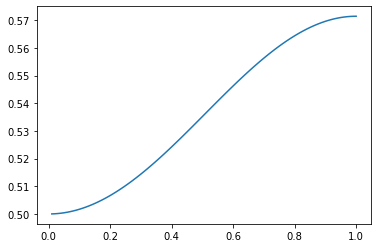

In [64]:
d_ba_s = sp.Symbol("\delta_{BA}^{*}")
eps = sp.Symbol("\epsilon")
S = sp.Symbol("S")
Om_cb = 1/sp.sqrt((d_ba_s**2)/3 + (1+eps**2)/4)
Om_ba = eps*Om_cb
d_ba  = d_ba_s*Om_cb

#Om_cb = Om_cb/sp.sqrt(S)
#Om_ba = Om_ba/sp.sqrt(S)
#d_ba  =d_ba/sp.sqrt(S) 


N8 = d_ba/sp.sqrt(3)
N1 = Om_cb/2
N6 = Om_ba/2

exp = ((2)/(3*sp.sqrt(3)))*(3*(N1**2)*N8  -(3*(N6**2)*N8)/2 -N8**3)
print("the determinat")
display(sp.simplify(exp))
display(sp.simplify(Om_cb*Om_ba))
print(" the factor")
Om_cb_ = Om_cb.subs(d_ba_s,1/sp.sympify(2))
Om_ba_ = Om_ba.subs(d_ba_s,1/sp.sympify(2))
Factor = 2*(((1/sp.sympify(4))*Om_cb_*Om_ba_)**2)/(27*det_of_eps**2-4)
display(Factor)
display(sp.simplify(Factor))
display((sp.series(Factor,eps)))
Factor_f = lambdify([eps],Factor)
plt.plot(eps_arr,-6*Factor_f(eps_arr))
display(det_of_eps)
display(sp.simplify(det_of_eps**2))

In [45]:
H_M =(1/sp.sqrt(3))*d_ba*lambda_8 + (1/sp.sympify(2))*Om_cb*lambda_1 + (1/sp.sympify(2))*Om_ba*lambda_6
print("determinant")
display(sp.simplify(sp.det(H_M)))
print("determinant with d_ba_s = 0.5")

det_of_eps = sp.simplify(sp.det(H_M).subs(d_ba_s,1/sp.sympify(2)))
display(det_of_eps)
print(sp.latex(sp.simplify(sp.det(H_M).subs(d_ba_s,1/sp.sympify(2)))))
display(sp.diff(sp.simplify(sp.det(H_M)),d_ba_s))
display(sp.simplify(sp.diff(sp.simplify(sp.det(H_M)),d_ba_s)*3*(4*d_ba_s**2+3*eps**2+3)**(5/sp.sympify(2))))
"""H_M = H_M.subs(eps,1/sp.sympify(100))
exps = []
for eig in H_M.eigenvals():
    exps.append(eig)
HHA = lambdify([d_ba_s],exps[0])
HHB = lambdify([d_ba_s],exps[1])
HHC = lambdify([d_ba_s],exps[2])
d_ba_s_arr = np.linspace(-10,10,100)


plt.plot(d_ba_s_arr,HHA(d_ba_s_arr))
plt.plot(d_ba_s_arr,HHB(d_ba_s_arr))
plt.plot(d_ba_s_arr,HHC(d_ba_s_arr))
plt.plot(d_ba_s_arr,HHB(d_ba_s_arr)*HHA(d_ba_s_arr)*HHC(d_ba_s_arr))"""

determinant


2*sqrt(3)*\delta_{BA}^{*}*(-8*\delta_{BA}^{*}**2 - 9*\epsilon**2 + 18)/(9*(4*\delta_{BA}^{*}**2 + 3*\epsilon**2 + 3)**(3/2))

determinant with d_ba_s = 0.5


sqrt(3)*(16/9 - \epsilon**2)/(3*\epsilon**2 + 4)**(3/2)

\frac{\sqrt{3} \left(\frac{16}{9} - \epsilon^{2}\right)}{\left(3 \epsilon^{2} + 4\right)^{\frac{3}{2}}}


-8*sqrt(3)*\delta_{BA}^{*}**2*(-8*\delta_{BA}^{*}**2 - 9*\epsilon**2 + 18)/(3*(4*\delta_{BA}^{*}**2 + 3*\epsilon**2 + 3)**(5/2)) - 32*sqrt(3)*\delta_{BA}^{*}**2/(9*(4*\delta_{BA}^{*}**2 + 3*\epsilon**2 + 3)**(3/2)) + 2*sqrt(3)*(-8*\delta_{BA}^{*}**2 - 9*\epsilon**2 + 18)/(9*(4*\delta_{BA}^{*}**2 + 3*\epsilon**2 + 3)**(3/2))

18*sqrt(3)*(-8*\delta_{BA}^{*}**2 - \epsilon**4 + \epsilon**2 + 2)

'H_M = H_M.subs(eps,1/sp.sympify(100))\nexps = []\nfor eig in H_M.eigenvals():\n    exps.append(eig)\nHHA = lambdify([d_ba_s],exps[0])\nHHB = lambdify([d_ba_s],exps[1])\nHHC = lambdify([d_ba_s],exps[2])\nd_ba_s_arr = np.linspace(-10,10,100)\n\n\nplt.plot(d_ba_s_arr,HHA(d_ba_s_arr))\nplt.plot(d_ba_s_arr,HHB(d_ba_s_arr))\nplt.plot(d_ba_s_arr,HHC(d_ba_s_arr))\nplt.plot(d_ba_s_arr,HHB(d_ba_s_arr)*HHA(d_ba_s_arr)*HHC(d_ba_s_arr))'

In [46]:
A =sp.Symbol("A")
sol =sp.solve(det_of_a-A,a)

-sqrt(2)*sqrt(-2**(2/3)*(81*(16/9 - \epsilon**2)**2/(3*\epsilon**2 + 4)**3 + 3*sqrt(3)*sqrt(243*(16/9 - \epsilon**2)**4/(3*\epsilon**2 + 4)**6 - 12*(16/9 - \epsilon**2)**2/(3*\epsilon**2 + 4)**3) - 2)**(1/3) + 4 - 2*2**(1/3)/(81*(16/9 - \epsilon**2)**2/(3*\epsilon**2 + 4)**3 + 3*sqrt(3)*sqrt(243*(16/9 - \epsilon**2)**4/(3*\epsilon**2 + 4)**6 - 12*(16/9 - \epsilon**2)**2/(3*\epsilon**2 + 4)**3) - 2)**(1/3))/4

C:\Users\Bruker\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.06098033064239021-2.8447262546833783e-17j)


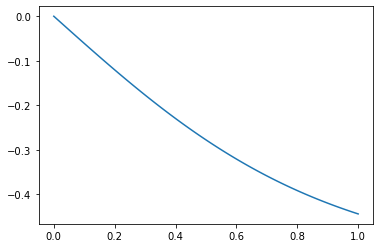

In [47]:

sol0 = sol[0].subs(A,det_of_eps)
display(sol0)
al = lambdify([eps],sol0)
eps_arr= np.linspace(0,1,100)
plt.plot(eps_arr,al(eps_arr))
print(al(0.1))
#eq = (sp.sqrt(3)/8)*(16/sp.sympify(9)-3*eps**2)-(2/(3*sp.sqrt(3)))*((9*a**2)/2 - 1)
series = sp.series(sol0,eps)
#print(series.args)

-1927*sqrt(6)*\epsilon**5/32768

-sqrt(6)*\epsilon/4

27*sqrt(6)*\epsilon**3/256

O(\epsilon**6)

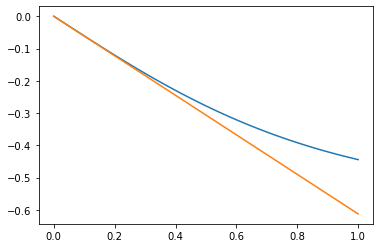

In [48]:
approx = lambdify([eps],series.args[1]) #+series.args[2]
for el in series.args:
    display(el)
plt.plot(eps_arr,al(eps_arr))
plt.plot(eps_arr,approx(eps_arr))

In [ ]:
%matplotlib qt
#plt.plot(d_ba_s_l,np.array(max_l_3))
print("d_ba_scaled value")
print(d_ba_s_l[max_l_3.index(max(max_l_3))])
print("max val")
print(max(max_l_3))
fig, axs = plt.subplots()
fig.set_size_inches(10, 5)
print(axs)
axs.plot(d_ba_s_l,np.array(max_l_3),linewidth=3)
axs.set_xlabel(r"$\frac{\delta_{BA}}{\Omega_{cb}}$",fontsize=37)
axs.set_ylabel(r"$ P_{max}(C\to A) $",fontsize=31)
axs.set_title("The maximum probability for the state to evolve to A",fontsize = 40)
axs.tick_params(axis='both', which='major', labelsize=20)
#axs.text(np.sqrt(3)/2+0.01, 1/2+0.02, 'state C', fontsize=12)
#axs.plot(-0.045, -1-0.1, 'state A', fontsize=12)

In [ ]:
sp.simplify(inst.another_F()-inst.naked_F)


In [ ]:
i = expressions()
i.B_k
display(i.B_0)
display(i.B_1)
display(i.B_2)
display(sp.expand(i.B0*i.B1*i.B2))
display(sp.simplify(i.h_1*i.h_0+i.h_2*i.h_0+i.h_1*i.h_2))
display(sp.simplify(i.B_0+i.B_1+i.B_2))


sp.factor(81*phi**2-324*phi+24)

In [ ]:
rho = (1/3)*(I+sp.sqrt(3)*(m_1*lambda_1+m_2*lambda_2+m_3*lambda_3+m_4*lambda_4+m_5*lambda_5+m_6*lambda_6+m_7*lambda_7+m_8*lambda_8))

In [ ]:

class m_vectors:
    def __init__(self,RHO_EVOL):
        self.RHO_EVOL = RHO_EVOL
        self.gen_rho_el()
        self.m_l = self.gen_m()
    def gen_rho_el(self):
        self.rho_l =[
            [],
            [],
            [],
            [],
            [],
            [],
            [],
            [],
            [],
        ]
        for mat in self.RHO_EVOL:
            self.rho_l[0].append(complex(mat[0][0]))
            self.rho_l[1].append(complex(mat[0][1]))
            self.rho_l[2].append(complex(mat[0][2]))
            self.rho_l[3].append(complex(mat[1][0]))
            self.rho_l[4].append(complex(mat[1][1]))
            self.rho_l[5].append(complex(mat[1][2]))
            self.rho_l[6].append(complex(mat[2][0]))
            self.rho_l[7].append(complex(mat[2][1]))
            self.rho_l[8].append(complex(mat[2][2]))
        self.rho_l = [np.array(el) for el in self.rho_l]
    def gen_m(self):
        arr = []
        arr.append(np.sqrt(3)*np.real(self.rho_l[1]))
        arr.append(np.sqrt(3)*np.imag(self.rho_l[1]))
        arr.append((np.sqrt(3)/(2))*np.real(self.rho_l[0]-self.rho_l[4]))
        arr.append(np.sqrt(3)*np.real(self.rho_l[2]))
        arr.append(np.sqrt(3)*np.imag(self.rho_l[2]))
        arr.append(np.sqrt(3)*np.real(self.rho_l[5]))
        arr.append(np.sqrt(3)*np.imag(self.rho_l[5]))
        arr.append((1/2)*(1-3*np.real(self.rho_l[8])))
        return arr

In [ ]:
class plotting_m:
    def __init__(self,m_l):
        self.m_l = m_l

    def circle(self):
        theta = np.linspace(0,2*np.pi,100)
        x= np.cos(theta)
        y= np.sin(theta)
        plt.plot(x,y) # outer boundary
        plt.plot((1/2)*x,(1/2)*y) # inner boundary
        plt.plot((1/np.sqrt(3))*x,(1/np.sqrt(3))*y) # middle boundary

    def plot_cartan(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[2],self.m_l[7],'o')
        plt.plot([-np.sqrt(3)/2,np.sqrt(3)/2],[1/2,1/2],'b')
        plt.plot([0,-np.sqrt(3)/2],[-1,1/2],'b')
        plt.plot([0,np.sqrt(3)/2],[-1,1/2],'b')
        
        
        self.circle()
        
        plt.text(np.sqrt(3)/2+0.01, 1/2, 'state C', fontsize=12)
        plt.text(-np.sqrt(3)/2-0.14, 1/2, 'state B', fontsize=12)
        plt.text(-0.045, -1-0.1, 'state A', fontsize=12)
        D = 0.5 #the displacement size of the plot
        plt.axis([-1/2-D, 1/2+D, -1.2-D, 2/3+D])
        plt.xlabel("m_3",fontsize=16)
        plt.ylabel("m_8",fontsize=16)
        plt.title("Evolution of a 3-level quantum system",fontsize=16)
        plt.show()
    def plot_1_2(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[0],self.m_l[1],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_4_5(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[3],self.m_l[4],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_6_7(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[5],self.m_l[6],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_1_8(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[0],self.m_l[7],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_3_4(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[2],self.m_l[3],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()
    def plot_4_8(self):
        plt.figure(figsize=[10, 10])
        plt.plot(self.m_l[3],self.m_l[7],'g:')
        plt.axis([-2, 2, -2, 2])
        self.circle()
        plt.show()

In [ ]:
RHO = lambdify([[m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8]],rho)
RHO_l =[]
N=100
for i in range(N):
    for j in range(N):
        m3 = (2*i)/N - 1
        m8 = (2*j)/N - 1
        rn = np.array([m3,m8,0,0,0,0,0,0])
        RHO_ = RHO(rn)
        w,v= np.linalg.eig(RHO_)
        eig = np.real(w)
        pos_elements = eig>=0
        if np.all(pos_elements):   
            RHO_l.append(RHO_)
print(len(RHO_l))
m_inst = m_vectors(RHO_l)
m = plotting_m(m_inst.m_l)
m.plot_cartan()
m.plot_1_2()
m.plot_4_5()
m.plot_6_7()
m.plot_1_8()
m.plot_3_4()
m.plot_4_8()

In [ ]:
"""RHO = lambdify([[m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8]],rho)

#rn = np.random.rand(8)*2-1
rn = np.array([0.5,0,0,0,0,0,0,0]) #0.5775
RHO_ = RHO(rn)
w,v= np.linalg.eig(RHO_)
eig = np.real(w)
print(eig)
pos_elements = eig>=0
np.all(pos_elements)


m_inst = m_vectors([RHO_])
m = plotting_m(m_inst.m_l)
m.plot_cartan()
m.plot_1_2()
m.plot_4_5()
m.plot_6_7()"""

In [ ]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig, axs = plt.subplots(2,2)
print(axs)
fig.suptitle('Vertically stacked subplots')
axs[0][0].plot(x, y)
axs[0][1].plot(x, -y)
axs[1][0].plot(x, y)
axs[1][1].plot(x, -y)

In [ ]:
s = "]][[]]]][[]]"